# **EMPLOYEE ATTRITION PREDICTION**

**This section of the code:**

**Imports Libraries:**

pandas: For data manipulation and analysis.

numpy: For numerical computations.

seaborn and matplotlib.pyplot: For data visualization.

sklearn modules: For model training, preprocessing, and evaluation.

**Loads the Dataset:**

Reads the file employee_attrition_data.csv using pandas into a DataFrame named data.

**Displays the Dataset:**

Simply outputs the dataset, showing its first few rows and structure.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
data = pd.read_csv('/content/employee_attrition_data.csv')

data


,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,39,Female,HR,HR Specialist,3,0.377435,239,0,71403,0
996,996,50,Male,Engineering,Manager,1,0.431152,154,0,30181,1
997,997,52,Male,Engineering,Analyst,3,0.647102,206,0,64143,0
998,998,37,Female,HR,HR Specialist,2,0.304813,241,0,74383,1


**Displays the First Few Rows:**

Uses the head() method to print the first five rows of the dataset by default.

This helps to get an initial understanding of the dataset's structure, including:

Column names.

Data types.

Initial sample of values in each column.

In [ ]:
# Display the first few rows of the dataset
data.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


**Check Dataset Info:**

data.info() displays:

Column names.

Data types (int64, float64, object, etc.).

Non-null count for each column (to identify missing values).

Total memory usage.

Identify Missing Values:

data.isnull().sum()

counts the number of NaN values in each column.
Helps identify columns that may need cleaning or imputation.

EXploratary Data Analysis (EDA)

In [ ]:
# Check for null values and data types
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB
None
Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Compan

**This code creates a count plot to visualize the distribution of the Attrition column:**

**Set Plot Dimensions:**

plt.figure(figsize=(5, 5)) specifies the plot size.

**Count Plot:**

sns.countplot generates a bar chart showing the count of each unique value in the Attrition column.
x='Attrition' sets the x-axis to the Attrition column.
data=data specifies the dataset.
palette='Blues' adds a blue color scheme to the bars.

**Add Titles and Labels:**

plt.title, plt.xlabel, and plt.ylabel add descriptive text to the chart.

**Display the Plot:**

plt.show() renders the visualization.

<ipython-input-6-8f1fb19fec18>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=data, palette='Blues')


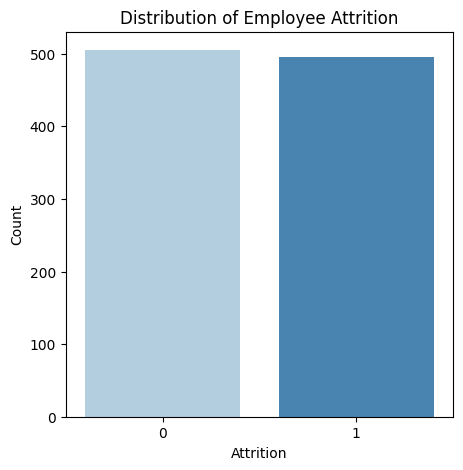

In [ ]:
# Create a count plot for the 'Attrition' column
plt.figure(figsize=(5, 5))
sns.countplot(x='Attrition', data=data, palette='Blues')
plt.title('Distribution of Employee Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

**Count Plot:**

sns.countplot(data['Attrition']):

Directly visualizes the counts of unique values in the Attrition column without specifying x.
Defaults to plotting the counts on the y-axis.

**Title:**

plt.title("Attrition Distribution") adds a descriptive title to the plot.

**Display the Plot:**

plt.show() renders the visualization.

**Difference from Previous Code:**

This approach doesn't explicitly define axis labels, making it slightly simpler.

The plot still shows the distribution of employees who left (Yes) versus those who stayed (No).

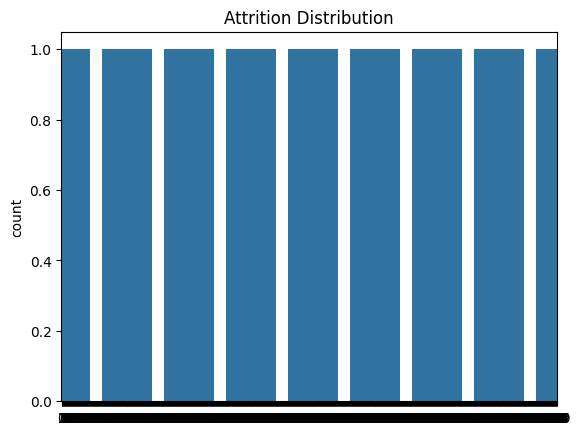

In [ ]:
# Visualize the distribution of the target variable ('Attrition')
sns.countplot(data['Attrition'])
plt.title("Attrition Distribution")
plt.show()



**Boxplot Creation:**

sns.boxplot(x='Attrition', y='Age', data=data):

x='Attrition': Groups the data by attrition status (Yes or No).
y='Age': Shows the distribution of the Age column for each attrition group.
data=data: Specifies the dataset.

**Add Title:**

plt.title("Age Distribution by Attrition Status") gives the plot a meaningful title.

**Display the Plot:**

plt.show() renders the boxplot.

**Insights from this Plot:**

**Boxplot Highlights:**
Median age for each attrition group.
Spread (range) and potential outliers in age distribution for employees who left (Yes) or stayed (No).

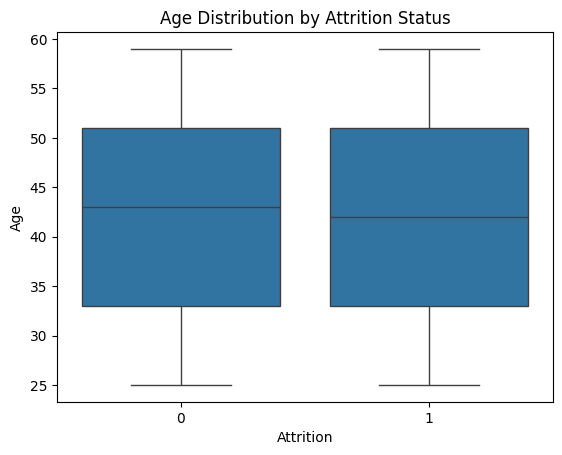

In [ ]:
# Plot age distribution by attrition status
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title("Age Distribution by Attrition Status")
plt.show()

**creates a count plot to visualize attrition trends across job roles:**

**Set Plot Dimensions:**

plt.figure(figsize=(10, 6)) increases the plot size to accommodate a potentially large number of job roles.

**Count Plot:**

sns.countplot:
x='Job_Title': Groups the data by the Job_Title column (or a similar column for roles).
hue='Attrition': Adds color-coded bars for each attrition status (Yes and No).
data=data: Specifies the dataset.

**Add Title:**

plt.title("Attrition by Job Role") gives context to the chart.

**Rotate x-axis Labels:**

plt.xticks(rotation=45) rotates the job titles for better readability.

**Display the Plot:**

plt.show() renders the visualization.

**Purpose:**

**This plot helps identify:**

Which job roles have higher or lower attrition rates.

Variations in attrition patterns across different roles.

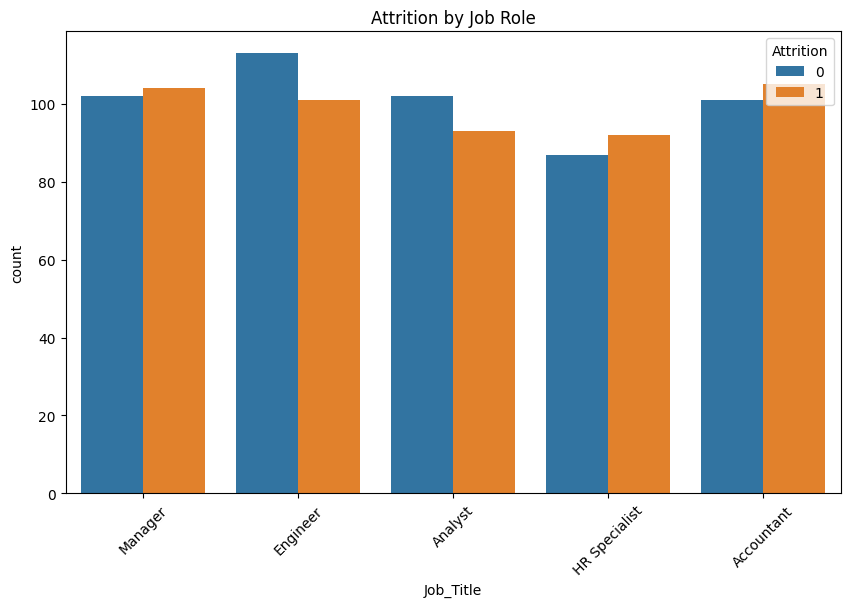

In [ ]:
# Visualize categorical variables, e.g., job role
plt.figure(figsize=(10, 6))

sns.countplot(x='Job_Title', hue='Attrition', data=data)
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()

**Here we performs a correlation analysis and visualizes the relationships among numeric variables using a heatmap:**

**Breakdown:**

**Subset Numeric Variables:**

numeric_vars: Contains only numeric columns relevant to the analysis, including Years_at_Company, Age, Average_Monthly_Hours, etc.
Ensures that only continuous or ordinal variables are included for the correlation matrix.

**Calculate Correlation Matrix:**

numeric_vars.corr(): Computes the pairwise Pearson correlation coefficients for the numeric variables.
Outputs a symmetric matrix showing how each variable correlates with the others (values between -1 and 1).

**Create Heatmap:**

sns.heatmap:
cor_matrix: Uses the computed correlation matrix as input.
annot=True: Displays the correlation values inside the heatmap cells.
fmt='.2f': Formats the correlation values to two decimal places.
cmap='coolwarm': Uses a diverging color palette to highlight positive (red) and negative (blue) correlations.
cbar=True: Displays a color bar for reference.

**Add Title:**

plt.title('Correlation Matrix of Numeric Variables') adds a descriptive title to the chart.
Display the Plot:

plt.show() renders the heatmap.

**Purpose:**

Helps identify strong correlations (positive or negative) among variables.

Useful for feature selection or understanding relationships, e.g., how Attrition correlates with other variables.

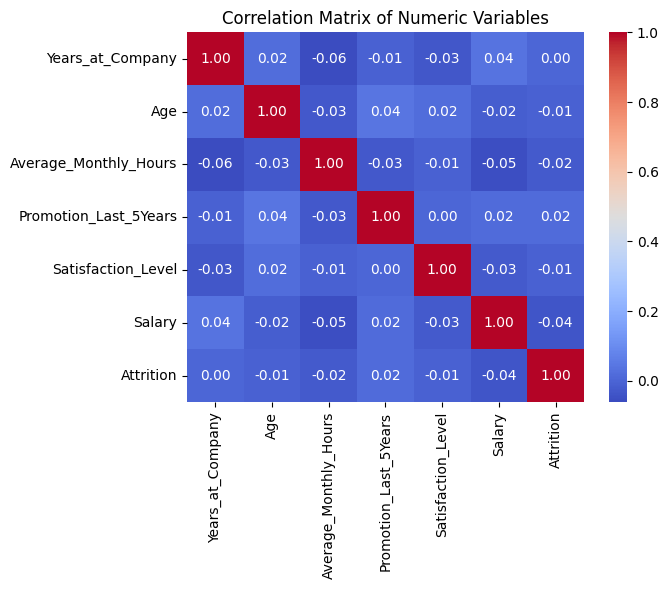

In [ ]:
# 2.5 Correlation Analysis
# Correlation matrix for numeric variables
numeric_vars = data[['Years_at_Company', 'Age', 'Average_Monthly_Hours', 'Promotion_Last_5Years', 'Satisfaction_Level', 'Salary', 'Attrition']]
cor_matrix = numeric_vars.corr()

# Plotting correlation matrix
sns.heatmap(cor_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

**Here we handles data preprocessing steps for machine learning, including one-hot encoding, train-test split, and scaling:**

**Breakdown:**

One-Hot Encoding:

data = pd.get_dummies(data, drop_first=True):
Converts categorical variables into dummy (binary) variables using one-hot encoding.
drop_first=True drops the first category of each variable to avoid multicollinearity (as it's redundant with the other dummy variables).

**Feature and Target Definition:**

X = data.drop('Attrition', axis=1):
Defines X as the feature set by dropping the target variable (Attrition).
y = data['Attrition']:
Defines y as the target variable, which is the Attrition column.

**Train-Test Split:**

train_test_split(X, y, test_size=0.2, random_state=42):
Splits the data into training (80%) and testing (20%) sets.
random_state=42 ensures reproducibility of the split.

**Feature Scaling:**

scaler = StandardScaler():

Creates an instance of the StandardScaler to standardize the features.
X_train = scaler.fit_transform(X_train):

Scales the training data by fitting the scaler to it and then transforming it.

X_test = scaler.transform(X_test):

Scales the test data using the same scaler, without fitting it again.

**Purpose:**

One-hot encoding ensures that categorical variables are converted into numerical form for machine learning models.

Scaling is important to standardize the data, especially for algorithms like logistic regression that are sensitive to feature scales.

Splitting the data allows for training and testing the model on separate datasets to evaluate performance.

**Data Preprocessing**

In [ ]:
# Convert categorical variables to dummy variables (one-hot encoding)
data = pd.get_dummies(data, drop_first=True)

# Define features and target
X = data.drop('Attrition', axis=1)  # Features
y = data['Attrition']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Logestic Regession


**snippet initializes, trains, and makes predictions using a Logistic Regression model:**

**Breakdown:**

**Initialize the Logistic Regression Model:**

model = LogisticRegression():
Creates an instance of the LogisticRegression model.

Train the Model:

model.fit(X_train, y_train):
Trains the model on the training data (X_train and y_train).
The model learns to predict the Attrition status based on the features in X_train.

Make Predictions:

y_pred = model.predict(X_test):
Uses the trained model to predict the Attrition status (Yes or No) for the test data (X_test).

y_pred_prob = model.predict_proba(X_test)[:, 1]:

Calculates the predicted probabilities for each class (Yes and No).
[:, 1] selects the probability of the positive class (attrition = Yes), which is used for evaluating the model’s performance.

Purpose:

Training the model: Allows the model to learn patterns from the training data.

Prediction: The model predicts whether an employee will leave (Yes) or stay (No).

Probabilities: The model provides probabilities for class membership, which can be useful for performance evaluation (e.g., ROC curve).

In [ ]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


**We generates a confusion matrix to evaluate the performance of the logistic regression model:**

Breakdown:

**Confusion Matrix:**

conf_matrix = confusion_matrix(y_test, y_pred):

Compares the true labels (y_test) with the predicted labels (y_pred).

Outputs a 2x2 matrix, showing:

True Positives (TP): Correctly predicted Yes (Attrition = 1).

True Negatives (TN): Correctly predicted No (Attrition = 0).

False Positives (FP): Incorrectly predicted Yes (but the actual label is No).

False Negatives (FN): Incorrectly predicted No (but the actual label is Yes).

**Heatmap of the Confusion Matrix:**

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues"):

Plots the confusion matrix as a heatmap.
annot=True adds the numerical values to each cell.
fmt="d" ensures that the values are displayed as integers.
cmap="Blues" uses a blue color palette for the heatmap.

Add Title and Labels:

plt.title("Confusion Matrix"): Adds a title to the plot.

plt.xlabel("Predicted"): Labels the x-axis as "Predicted".

plt.ylabel("Actual"): Labels the y-axis as "Actual".

Display the Plot:

plt.show() renders the heatmap.

Purpose:

The confusion matrix provides an overview of how well the model predicted the Attrition status.

It helps identify if the model is biased toward one class or if it makes systematic errors.

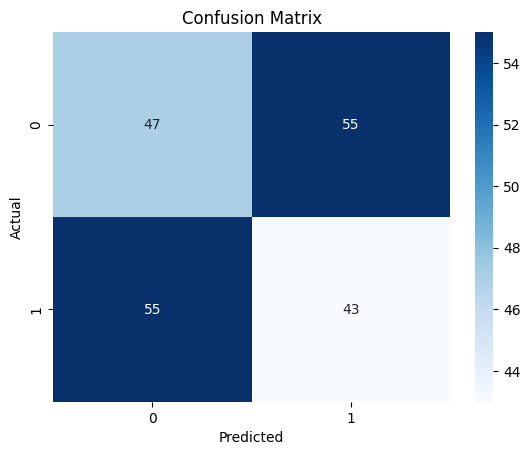

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



**Evaluates the model's performance using a Classification Report, ROC Curve, and AUC Score:**

Breakdown:

**Classification Report:**

print("Classification Report:"): Prints a label for the classification report.
print(classification_report(y_test, y_pred)):

Displays precision, recall, F1-score, and support for both classes (Attrition = 1 and Attrition = 0).

Provides insight into the model's performance across multiple metrics:

Precision: Proportion of true positives among predicted positives.

Recall: Proportion of true positives among actual positives.

F1-score: Harmonic mean of precision and recall.

Support: Number of occurrences of each class in the dataset.

**ROC Curve and AUC Score:**

roc_auc = roc_auc_score(y_test, y_pred_prob):
Calculates the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve. A higher AUC indicates better model performance.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob):
Computes the False Positive Rate (FPR) and True Positive Rate (TPR) at different thresholds for the ROC curve.

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}"):
Plots the ROC curve, showing the trade-off between TPR and FPR.
Displays the AUC score in the legend.

plt.plot([0, 1], [0, 1], 'k--'):
Adds a dashed line representing the performance of a random classifier (AUC = 0.5).

Plot Labels:

plt.xlabel("False Positive Rate"): Labels the x-axis.

plt.ylabel("True Positive Rate"): Labels the y-axis.

plt.title("ROC Curve"): Adds a title to the plot.

plt.legend(loc="lower right"): Adds a legend to the plot in the lower right corner.

Display the Plot:

plt.show() renders the ROC curve.

Purpose:

The Classification Report provides detailed metrics for evaluating the classification performance, helping to identify areas where the model can be improved.

The ROC Curve visualizes the model's ability to discriminate between positive and negative classes, with the AUC Score summarizing the model's overall performance.

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       102
           1       0.44      0.44      0.44        98

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200



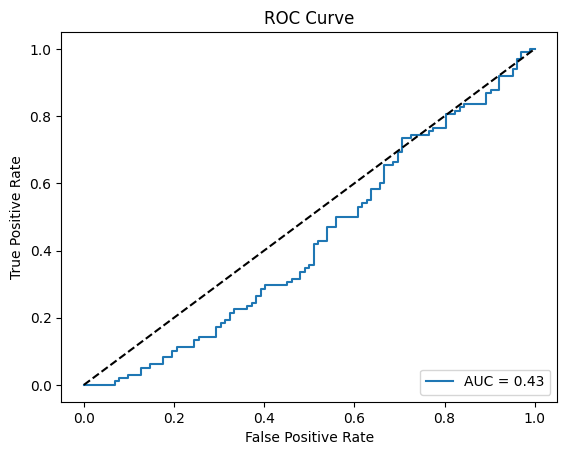

In [ ]:

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

**We visualizes the feature importance of the logistic regression model based on the coefficients learned during training:**

Breakdown:

**Extract Feature Importance:**

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]}):

Creates a DataFrame with two columns:

Feature: Contains the names of the features.

Importance: Contains the corresponding coefficients (weights) learned by the logistic regression model. These coefficients represent the importance of each feature in predicting the target variable (Attrition).

model.coef_[0] accesses the coefficients of the trained model, where [0] selects the first (and only) set of coefficients (for binary classification).

Sort Features by Importance:

feature_importance = feature_importance.sort_values(by='Importance', ascending=False):

Sorts the features in descending order of importance (based on the magnitude of the coefficients).

Visualize Feature Importance:

plt.figure(figsize=(10, 6)):

Sets the figure size for the plot.

sns.barplot(x='Importance', y='Feature', data=feature_importance):

Creates a horizontal bar plot showing the importance of each feature.

The x-axis represents the magnitude of the feature importance (coefficients), and the y-axis represents the feature names.

plt.title("Feature Importance (Logistic Regression)"): Adds a title to the plot.

Display the Plot:

plt.show() renders the bar plot.

Purpose:

The bar plot helps visualize which features have the most impact on the model's predictions.

Features with larger positive or negative coefficients are more important in determining the likelihood of employee attrition, with a higher absolute value of the coefficient indicating greater influence.

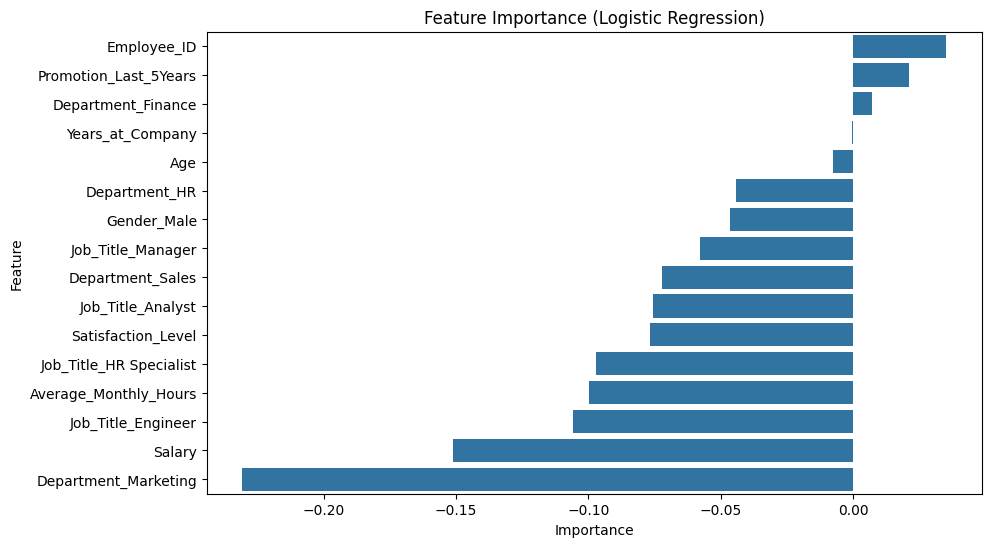

In [ ]:
# Extract feature importance from logistic regression coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance (Logistic Regression)")
plt.show()


In [ ]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.4500


In [ ]:
# Import necessary libraries for different models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier (SVC)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier()
}

# Train and evaluate each model
accuracies = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy for each model
    accuracies[model_name] = accuracy

# Display the accuracies of all models
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Identify the best model
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Logistic Regression Accuracy: 0.4500
Random Forest Accuracy: 0.4550
Gradient Boosting Accuracy: 0.4250
Support Vector Classifier (SVC) Accuracy: 0.3950
K-Nearest Neighbors (KNN) Accuracy: 0.4750

Best Model: K-Nearest Neighbors (KNN) with Accuracy: 0.4750
